In [1]:
import CalcLoadPlotData as clp
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm

In [2]:
yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18

#for temperature calculation:
kB_SI = 1.38e-23 #J/K
kB_cgs = kB_SI * 1e7
X_H = 0.76 # hydrogen mass fraction
gamma = 5/3
m_p = 1.67e-24 # proton mass in g


UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e18 	# pc
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitMass_in_g = 1.989e31		# 0.01 solar masses
UnitMass_in_Msun = UnitMass_in_g / 1.989e33

UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr

In [3]:
folderPath = "/vera/ptmp/gc/xboecker/run/5_SN_cluster_final/"
folderNames = ["0_testAgain"]#, "0_base_with_IO_fields"]#, "1_density_0_5", "1_density_10",  "2_stars_5", "2_stars_100", "3_rad_5pc", "3_rad_40pc", "4_tempRad_5kyr", "4_tempRad_50kyr"]
#folderPath = "/u/xboecker/run/3_multiple_SNe/"
#folderNames = ["0_1_star", "1_stars_10_linear_spacial_distribution_rad_10", "2_stars_10_linear_temporal_distribution_temp_5kyr", "3_stars_10_linear_spacial_and_temporal_distribution_rad_10pc_temp_5kyr"]
dataFolders = np.full(len(folderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(folderNames)):
    dataFolders[i] = folderPath+folderNames[i]+"/output"
    

boxSize = 96
frameAmount = 40
frameNbrMultiplier = 10
TimeBetSnapshot_in_unit_time = 0.002

In [4]:
clp.GetUnitSystem()
clp.SetUnitSystem(UnitVelocity_in_cm_per_s,UnitLength_in_cm,UnitMass_in_g)
clp.GetUnitSystem()
print("\n")
clp.GetParameters()
clp.SetParameters(boxSize, frameAmount, frameNbrMultiplier, TimeBetSnapshot_in_unit_time)
clp.GetParameters()

UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31
UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31


boxSize = 96 
frameAmount = 40 
frameNbrMultiplier = 10 
TimeBetSnapshot_in_unit_time = 0.002
boxSize = 96 
frameAmount = 40 
frameNbrMultiplier = 10 
TimeBetSnapshot_in_unit_time = 0.002


### SNR Radius

load data


/vera/u/xboecker/arepo/jupyterNotebooks/CalcLoadPlotData.py:443: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


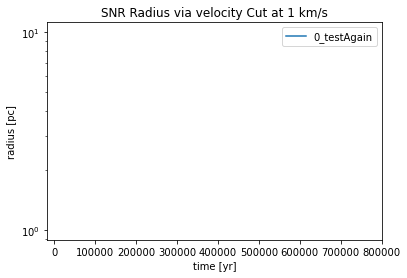

<Figure size 432x288 with 0 Axes>

In [15]:
radiiArray = np.full(((len(folderNames)), frameAmount), 0, dtype = np.float64)

for i in range(len(radiiArray)):
    radiiArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                        folderName = folderNames[i], 
                                        dataName = "velocityCutRadii", 
                                        calcDataOfOneSnapShotFunction = clp.velocityCutRadius,
                                        frameAmount = frameAmount, 
                                        recalculate = False)




clp.PlotData(data = radiiArray, 
         folderNames = folderNames, 
         title = "SNR Radius via velocity Cut at 1 km/s", 
         ylabel = "radius [pc]", 
         dataName = "velocityCutRadii", 
         unit_conversion_factor = 1,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)


### Total Momentum

load data
load data
load data
load data
load data
load data
load data
load data
load data


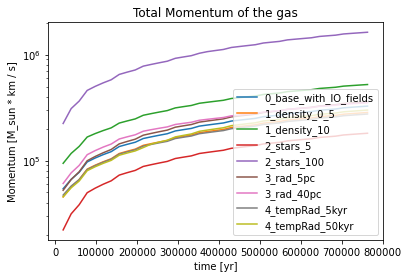

<Figure size 432x288 with 0 Axes>

In [10]:
dataNameForSaveFiles = "totalMomentum"
plotTitle = "Total Momentum of the gas"
plot_yLabel = "Momentum [M_sun * km / s]"
unitConversionFactor = UnitMass_in_Msun * UnitVelocity_in_km_per_s
functionToComputeData = clp.getTotalMomentum

dataArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                        folderName = folderNames[i], 
                                        dataName = dataNameForSaveFiles, 
                                        calcDataOfOneSnapShotFunction = functionToComputeData, 
                                        frameAmount = frameAmount, 
                                        recalculate = False)




clp.PlotData(data = dataArray, 
         folderNames = folderNames, 
         title = plotTitle, 
         ylabel = plot_yLabel, 
         dataName = dataNameForSaveFiles, 
         unit_conversion_factor = unitConversionFactor,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

### max radial Velocity

load data
load data
load data
load data
load data
load data
load data
load data
load data


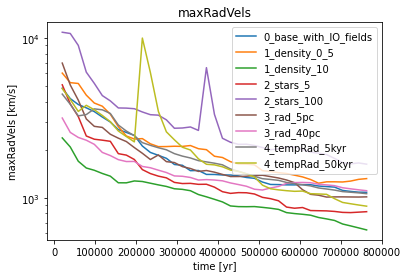

<Figure size 432x288 with 0 Axes>

In [12]:
maxRadVelArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    maxRadVelArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                            folderName = folderNames[i], 
                                             dataName = "maxRadVels", 
                                             calcDataOfOneSnapShotFunction = clp.getMaxRadialGasVelocity, 
                                        frameAmount = frameAmount, 
                                             recalculate = False)

clp.PlotData(data = maxRadVelArray, 
         folderNames = folderNames, 
         title = "maxRadVels", 
         ylabel = "maxRadVels [km/s]", 
         dataName = "maxRadVels", 
         unit_conversion_factor = UnitVelocity_in_km_per_s,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticVelocities = False)

### Terminal Momentum Plots

Literatur:
https://academic.oup.com/mnras/article/492/1/1243/5670636
terminal momentum of 1SN: 3.000 M_sun km/s
11SNe: 35.000 M_sun km/s (0.6pc resolution)
11SNe: 25.000 M_sun km/s ( 20pc resolution)

 Hopkins et al. (2018b) prescribe ∼5 × 10^5 M⊙*N_SNe*km/s of momentum per SN (at ρ = 1.33mH cm−3)
 
 
Martizzi: https://academic.oup.com/mnras/article/450/1/504/998665 (Fig. 4)
1SN, n=100 cm-3 --> radial momentum of the shock 1e43 g*cm/s ~ 1e6 M_sun*km/s

In [5]:
folderPath = "/vera/ptmp/gc/xboecker/run/5_SN_cluster_final/"
baseFolderName = "0_base_with_IO_fields"
densityFoldersNames = ["1_density_0_2", "1_density_0_5", "1_density_2", "1_density_10", "1_density_25", "1_density_50", "1_density_75", "1_density_100", "1_density_500"]
baseDensity = 1
densities = [0.2, 0.5, 2, 10, 25, 50, 75, 100, 500]
starFolderNames = ["2_stars_1",  "2_stars_5",  "2_stars_50", "2_stars_100"]
baseNStar = 10
nStars = [1, 5, 50, 100]
radFolderNames = ["3_rad_0pc", "3_rad_5pc", "3_rad_20pc", "3_rad_40pc"]
baseRad = 10
rads = [0, 5, 20, 40]
tempRadFolderNames = ["4_tempRad_0kyr", "4_tempRad_5kyr", "4_tempRad_25kyr", "4_tempRad_50kyr"]
baseTempRad = 10
tempRads = [0, 5, 25, 50]
folderNames = ["1_density_0_5", "0_base_with_IO_fields", "1_density_10", "1_density_25", "1_density_50", "1_density_75", "1_density_100", "1_density_500",  
               "2_stars_1",  "2_stars_5",  "2_stars_50", "2_stars_100", 
               "3_rad_0pc", "3_rad_5pc", "3_rad_20pc", "3_rad_40pc", 
               "4_tempRad_0kyr", "4_tempRad_5kyr", "4_tempRad_25kyr", "4_tempRad_50kyr", 
               "12_density_10_stars_100", "14_density_0_5_tempRad_25kyr", "23_stars_5_rad_5pc", "34_rad_40pc_tempRad_5kyr"]
densityDataFolders = np.full(len(densityFoldersNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
starDataFolders = np.full(len(starFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
radDataFolders = np.full(len(radFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
tempRadDataFolders = np.full(len(tempRadFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

dataFolders = np.full(len(folderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(densityDataFolders)):
    densityDataFolders[i] = folderPath+densityFoldersNames[i]+"/output"
for i in range(len(starDataFolders)):
    starDataFolders[i] = folderPath+starFolderNames[i]+"/output"
for i in range(len(radDataFolders)):
    radDataFolders[i] = folderPath+radFolderNames[i]+"/output"
for i in range(len(tempRadDataFolders)):
    tempRadDataFolders[i] = folderPath+tempRadFolderNames[i]+"/output"
    
for i in range(len(folderNames)):
    dataFolders[i] = folderPath+folderNames[i]+"/output"
    
baseDataFolder = folderPath+baseFolderName+"/output"

In [6]:
# calculate terminal momenta (via total momentum of last snapshot)
lastFrame = 400

densityTerminalMomenta =  np.zeros(len(densityFoldersNames))
starTerminalMomenta =  np.zeros(len(starFolderNames))
radTerminalMomenta =  np.zeros(len(radFolderNames))
tempRadTerminalMomenta =  np.zeros(len(tempRadFolderNames))
terminalMomenta =  np.zeros(len(folderNames))

for i in range(len(densityDataFolders)):
    densityTerminalMomenta[i] = clp.getTotalMomentum(densityDataFolders[i], lastFrame)
densityTerminalMomenta_in_cgs = densityTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(starDataFolders)):
    starTerminalMomenta[i] = clp.getTotalMomentum(starDataFolders[i], lastFrame)
starTerminalMomenta_in_cgs = starTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(radDataFolders)):
    radTerminalMomenta[i] = clp.getTotalMomentum(radDataFolders[i], lastFrame)
radTerminalMomenta_in_cgs = radTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(radDataFolders)):
    tempRadTerminalMomenta[i] = clp.getTotalMomentum(radDataFolders[i], lastFrame)
tempRadTerminalMomenta_in_cgs = tempRadTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(folderNames)):
    terminalMomenta[i] = clp.getTotalMomentum(dataFolders[i], lastFrame)
terminalMomenta_in_cgs = terminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s

baseTerminalMomentum = clp.getTotalMomentum(baseDataFolder, lastFrame)
baseTerminalMomentum_in_cgs = baseTerminalMomentum * UnitMass_in_Msun * UnitVelocity_in_km_per_s

In [7]:
minTerminalMomentum = np.min(terminalMomenta_in_cgs)
maxTerminalMomentum = np.max(terminalMomenta_in_cgs)

In [79]:
# densities = np.zeros(len(folderNames))
# nStar = np.array([10,10,10,10,1,5,100,10,10,10,10,10,10,10,10,100,10,5,10])
# rad = np.array([10,10,10,10,10,10,10,0,5,20,40,10,10,10,10,10,10,5,40])
# tempRad = np.array([10,10,10,10,10,10,10,10,10,10,10,0,5,25,50,10,25,10,5])
# for i in range(len(folderNames)):
#     densities[i] = clp.getDensities(dataFolders[i], 0)[0]
# densities /= densities[0]

#### Density vs n_star

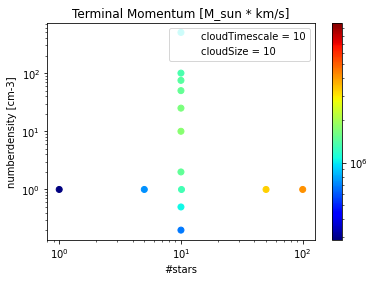

In [9]:
empty_patch = mpatches.Patch(color='none', label="cloudTimescale = 10") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10") 
plt.legend(handles=[empty_patch, empty_patch2])

s0 = plt.scatter(baseNStar, baseDensity, c=baseTerminalMomentum_in_cgs, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s1 = plt.scatter(np.full(len(densityFoldersNames), baseNStar), densities, c=densityTerminalMomenta_in_cgs, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s2 = plt.scatter(nStars, np.full(len(starFolderNames), baseDensity), c=starTerminalMomenta_in_cgs, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)

s0.set_norm(LogNorm())
s1.set_norm(LogNorm())
s2.set_norm(LogNorm())
s0.set_clim(minTerminalMomentum,maxTerminalMomentum)
s1.set_clim(minTerminalMomentum,maxTerminalMomentum)
s2.set_clim(minTerminalMomentum,maxTerminalMomentum)

plt.title("Terminal Momentum [M_sun * km/s]")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("#stars")
plt.ylabel("numberdensity [cm-3]")
cbar = plt.colorbar()

#### CloudSize vs TimeScale

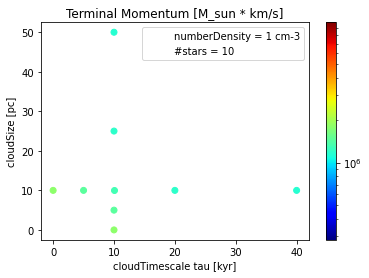

In [17]:
empty_patch = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch2 = mpatches.Patch(color='none', label="#stars = 10") 
plt.legend(handles=[empty_patch, empty_patch2])

s0 = plt.scatter(baseRad, baseTempRad, c=baseTerminalMomentum_in_cgs, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s1 = plt.scatter(np.full(len(tempRadFolderNames), baseRad), tempRads, c=tempRadTerminalMomenta_in_cgs, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s2 = plt.scatter(rads, np.full(len(radFolderNames), baseTempRad), c=radTerminalMomenta_in_cgs, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)

#s1 = plt.scatter(rad[0], tempRad[0], c=terminalMomenta_in_cgs[0], cmap="jet")
#s2 = plt.scatter(rad[7:15], tempRad[7:15], c=terminalMomenta_in_cgs[7:15], cmap="jet", vmin = np.min(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s, vmax = np.max(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s)
#s3 = plt.scatter(rad[18], tempRad[18], c=terminalMomenta_in_cgs[18], cmap="jet")

s0.set_norm(LogNorm())
s1.set_norm(LogNorm())
s2.set_norm(LogNorm())
#s3.set_norm(LogNorm())
s0.set_clim(minTerminalMomentum,maxTerminalMomentum)
s1.set_clim(minTerminalMomentum,maxTerminalMomentum)
s2.set_clim(minTerminalMomentum,maxTerminalMomentum)
#s3.set_clim(minTerminalMomentum,maxTerminalMomentum)

plt.title("Terminal Momentum [M_sun * km/s]")
plt.xlabel(r"cloudTimescale tau [kyr]")
plt.ylabel("cloudSize [pc]")
plt.colorbar()

### single parameter vs terminal momentum

In [8]:
import scipy.optimize
import matplotlib.pyplot as plt

In [34]:
def monoLinear(x, m, t, b):
    return m * x + b

def monoParab(x, m, t, b):
    return m * x**2 + t * x + b

def monoExp(x, m, t, b):
    return m * np.exp(-t * x)

def monoLog(x, m, t, b):
    return m * np.log(t * x)


def monoLogExp(x, m, t1, t2, b):
    return m * np.log(t1 * x**(1/2)) * np.exp(-t2 * x)

def fitValues(xValues, yValues, fitFct, p0, calcQuality = True):

    # perform the fit
    p0 = (1e6, .1, 1e6) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(fitFct, xValues, yValues, p0)
    m, t, b = params
    sampleRate = 20_000 # Hz
    tauSec = (1 / t) / sampleRate

    # determine quality of the fit
    
    if(calcQuality):
        squaredDiffs = np.square(yValues - fitFct(xValues, m, t, b))
        squaredDiffsFromMean = np.square(yValues - np.mean(yValues))
        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
        print(f"R² = {rSquared}")

    # plot the results
    # plt.plot(xValues, yValues, '.', label="data") # plot values that got fitted again
    x = np.linspace(np.min(xValues), np.max(xValues), 30)
    plt.plot(x, fitFct(x, m, t, b), '--', label="fitted")
    plt.title("Fitted Curve")

    # inspect the parameters
    
    if(fitFct == monoParab):
        print(f"Y = {m} * x**2 + {t} * x + {b}")
    if(fitFct == monoLinear):
        print(f"Y = {m} * x + {b}")
    if(fitFct == monoExp):
        print(f"Y = {m} * e^(-{t} * x) + {b}")
    elif(fitFct == monoLog):
        print(f"Y = {m} * log({t} * x) + {b}")
    elif(fitFct == monoLogExp):
        t1,t2 = T
        print(f"Y = {m} * log({t} * x) + {b}")
    print(f"Tau = {tauSec * 1e6} µs")
    
def fitValues4params(xValues, yValues, fitFct, p0, calcQuality = True):

    # perform the fit
    #p0 = (1e6, .1, 1e6) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(fitFct, xValues, yValues, p0)
    m, t1,t2, b = params
    sampleRate = 20_000 # Hz
    tauSec = (1 / t1) / sampleRate

    # determine quality of the fit
    
    if(calcQuality):
        squaredDiffs = np.square(yValues - fitFct(xValues, m, t1,t2, b))
        squaredDiffsFromMean = np.square(yValues - np.mean(yValues))
        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
        print(f"R² = {rSquared}")

    # plot the results
    # plt.plot(xValues, yValues, '.', label="data") # plot values that got fitted again
    x = np.logspace(-1, 3, 30)
    plt.plot(x, fitFct(x, m, t1,t2, b), '--', label="fitted")
    plt.title("Fitted Curve")

    # inspect the parameters
    if(fitFct == monoLinear):
        print(m + " * x + " + b)
    if(fitFct == monoExp):
        print(f"Y = {m} * e^(-{t} * x) + {b}")
    elif(fitFct == monoLog):
        print(f"Y = {m} * log({t} * x) + {b}")
    elif(fitFct == monoLogExp):
        print(f"Y = {m} * log({t1} * x) * e^(-{t2} * x) + {b}")
    print(f"Tau = {tauSec * 1e6} µs")
    
    return (m,t1,t2,b)

In [10]:
def monoExp2D(X, m, t1, t2, b):
    x1,x2 = X
    return m1 * np.exp(-t1 * x1) * np.exp(-t2 * x2) + b

#### density

Y = -0.10605930971215932 * x**2 + 0.24481211838124756 * x + 6.090556571996626
Tau = 204.2382555676213 µs


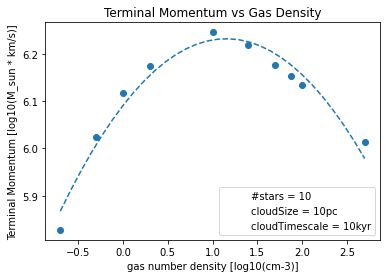

In [38]:
nStarArrayToFit = np.append(densities, baseDensity)
nStarTerminalMomentumArrayToFit = np.append(densityTerminalMomenta_in_cgs, baseTerminalMomentum_in_cgs)
xValues = np.log10(nStarArrayToFit)
yValues = np.log10(nStarTerminalMomentumArrayToFit)

def fct(x):
    return 4e5 * np.log(0.5 *x) * np.exp(-1e-1 * x) + 1.5e6


#x = np.linspace(np.min(densities), np.max(densities), 100000)
#x = np.logspace(-1, 3, 1000)
#plt.plot(x, fct(x), '--', label="fit test")

p0 = (1, 1, 1) # start with values near those we expect
#fitValues(densities[3:], densityTerminalMomenta_in_cgs[3:], monoExp, p0, False)
#p0 = (4e5, 0.5,0.1, 0)
fitValues(xValues, yValues, monoParab, p0, False)

plt.scatter(xValues, yValues)
#plt.scatter(densities, densityTerminalMomenta_in_cgs)

plt.title("Terminal Momentum vs Gas Density")
plt.xlabel("gas number density [log10(cm-3)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch1, empty_patch2, empty_patch3])

(-10.0, 1000.0)

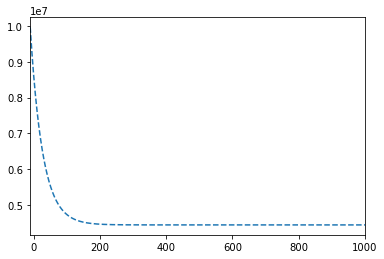

In [42]:
def testF(x):
    return 4224807.140591751 * np.exp(-0.026675524983074746 * x) + 4446534.69925895


x = np.linspace(-10, 1000, 10000)
#x = np.logspace(-1, 3, 1000)
plt.plot(x, testF(x), '--', label="fit test")
#plt.plot(x, 1/x**12, '--', label="fit test")
#plt.plot(x, 0.01/x**6, '--', label="fit test")
#plt.ylim(-5,5)
plt.xlim(-10,1000)

At the start: not much gas is heated, gets very fast but still has not much impact because it is just not much
At the end: very dens gas --> it doesn't really start moving

#### nStar

R² = 0.9933465138003696
Y = 0.5978148329134113 * x + 5.4689637263707045
Tau = 500.0 µs


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


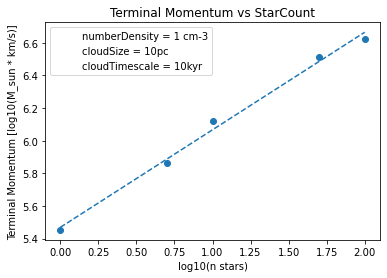

In [29]:


#terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895
# perform the fit
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
nStarArrayToFit = np.append(nStars, baseNStar)
nStarTerminalMomentumArrayToFit = np.append(starTerminalMomenta_in_cgs, baseTerminalMomentum_in_cgs)
xValues = np.log10(nStarArrayToFit)
yValues = np.log10(nStarTerminalMomentumArrayToFit)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs StarCount")
plt.xlabel("log10(n stars)")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch2, empty_patch3])

#### rad

R² = 0.9986483899477194
Y = 623000.4609932655 * e^(-0.1574346249457595 * x) + 1170831.6614692502
Tau = 317.5921435149756 µs


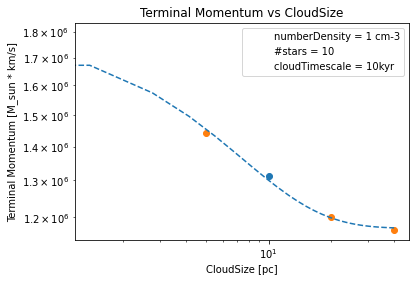

In [24]:
plt.scatter(baseRad, baseTerminalMomentum_in_cgs)
plt.scatter(rads, radTerminalMomenta_in_cgs)

p0 = (1e6, .1, 1e6) # start with values near those we expect
radArrayToFit = np.append(rads, baseRad)
radTerminalMomentumArrayToFit = np.append(radTerminalMomenta_in_cgs, baseTerminalMomentum_in_cgs)
fitValues(radArrayToFit, radTerminalMomentumArrayToFit, monoExp, p0)

plt.title("Terminal Momentum vs CloudSize")
plt.xlabel("CloudSize [pc]")
plt.ylabel("Terminal Momentum [M_sun * km/s]")

plt.xscale("log")
plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch1, empty_patch3])

#### tempRad

R² = 0.9979787804424246
Y = 615269.244061057 * e^(-0.1608744950623485 * x) + 1178550.0475671138
Tau = 310.80128631093453 µs


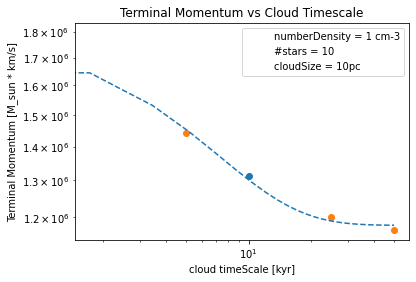

In [25]:
plt.scatter(baseTempRad, baseTerminalMomentum_in_cgs)
plt.scatter(tempRads, tempRadTerminalMomenta_in_cgs)

p0 = (1e6, .1, 1e6) # start with values near those we expect
radArrayToFit = np.append(tempRads, baseTempRad)
radTerminalMomentumArrayToFit = np.append(tempRadTerminalMomenta_in_cgs, baseTerminalMomentum_in_cgs)
fitValues(radArrayToFit, radTerminalMomentumArrayToFit, monoExp, p0)

plt.title("Terminal Momentum vs Cloud Timescale")
plt.xlabel("cloud timeScale [kyr]")
plt.ylabel("Terminal Momentum [M_sun * km/s]")

plt.xscale("log")
plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch1, empty_patch2])

In [31]:
#density
terminalMomentum = 794259.8457729041 * e^(-0.009245879897495304 * density) + 1026306.2521484414

#nStar
terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895

#rad
terminalMomentum = 623000.4609932655 * e^(-0.1574346249457595 * rad) + 1170831.6614692502

#tempRad
terminalMomentum = 615269.244061057 * e^(-0.1608744950623485 * tempRad) + 1178550.0475671138

make table of parameters
split cells depending on volume
xlog for density (x and y log all plots)
rnuaway star: 1e-3 density
high density: 1e3

multiply exponentials for final function

